# Image Classification

In [62]:
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, image
from IPython.display import display
from PIL import Image
import pickle 
import matplotlib.pyplot as plt

In [3]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


input_width = 100
input_height = 100

In [101]:
#Defining sequential model 
classifier = Sequential()

#using grayscale input
classifier.add(Conv2D(32, (3, 3), border_mode='same', input_shape = (input_width, input_height, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(BatchNormalization())

classifier.add(Conv2D(64, (3, 3), border_mode='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(BatchNormalization())

classifier.add(Conv2D(128, (3, 3), border_mode='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(BatchNormalization())

classifier.add(Conv2D(128, (3, 3), border_mode='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(BatchNormalization())

classifier.add(Conv2D(64, (3, 3), border_mode='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(BatchNormalization())

classifier.add(Flatten())
classifier.add(Dense(256, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.4))
classifier.add(Dense(64, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(optimizer ='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

/home/suneel/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., activation="relu", padding="same")`
  """
/home/suneel/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
/home/suneel/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  del sys.path[0]
/home/suneel/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/home/suneel/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
batch_normalization_54 (Batc (None, 25, 25, 64)        256       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 25, 25, 128)       73856     
__________

In [102]:
#Normalizing Input
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [103]:
training_data = train_datagen.flow_from_directory('./ImagesData/training_set',
                                                  target_size=(input_width, input_height),
                                                  batch_size = 40,
                                                  color_mode = 'grayscale',
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [104]:
test_set = test_datagen.flow_from_directory('./ImagesData/test_set',
                                            target_size=(input_width, input_height),
                                            batch_size=40,
                                            color_mode = 'grayscale',
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
for image in training_data:
    print(len(image))
    print(image[0].shape)
    break

2
(40, 100, 100, 1)


In [19]:
len(test_set)

50

In [105]:
%%time
#Starting Classification
print("Starting Classification")
history = classifier.fit_generator(training_data, steps_per_epoch=200, epochs=15, validation_data=test_set, validation_steps=50)

#Saving Model
pickle.dump(classifier, open('cnnModel7_copy.sav', 'wb'))
print('Model Serialized and Saved')

Starting Classification
Epoch 1/15
200/200 [==============================] - 84s 419ms/step - loss: 0.6875 - acc: 0.6193 - val_loss: 1.1119 - val_acc: 0.5780
Epoch 2/15
200/200 [==============================] - 79s 393ms/step - loss: 0.5652 - acc: 0.7100 - val_loss: 0.6967 - val_acc: 0.6785
Epoch 3/15
200/200 [==============================] - 81s 404ms/step - loss: 0.4827 - acc: 0.7710 - val_loss: 0.4681 - val_acc: 0.7925
Epoch 4/15
200/200 [==============================] - 80s 398ms/step - loss: 0.4190 - acc: 0.8111 - val_loss: 0.3794 - val_acc: 0.8265
Epoch 5/15
200/200 [==============================] - 80s 400ms/step - loss: 0.3630 - acc: 0.8359 - val_loss: 0.3858 - val_acc: 0.8315
Epoch 6/15
200/200 [==============================] - 80s 399ms/step - loss: 0.3376 - acc: 0.8501 - val_loss: 0.2983 - val_acc: 0.8810
Epoch 7/15
200/200 [==============================] - 80s 398ms/step - loss: 0.2994 - acc: 0.8677 - val_loss: 0.4036 - val_acc: 0.8240
Epoch 8/15
200/200 [===========

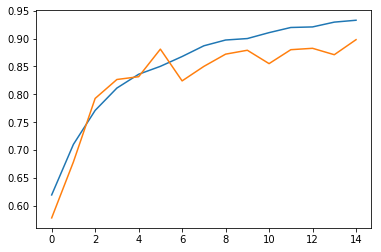

In [106]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

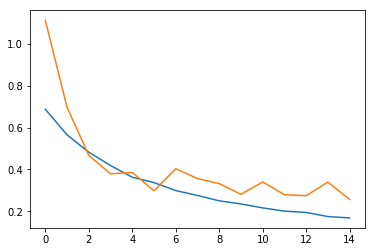

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
#Testing Model
test_path = "./ImagesData/New_Test_Data"

In [ ]:
#classifier = pickle.load(open('cnnModel5.sav', 'rb'))
#data = np.array([["FileName"], ["Class"]]).T

In [ ]:
for file in os.listdir(test_path):
    if(file.endswith(".jpg")):
        name = file
        img_test = image.load_img(test_path + "/" + file,target_size = (input_width,input_height), grayscale = True)
        img_test_arr = image.img_to_array(img_test)
        img_test_arr = np.expand_dims(img_test_arr, axis = 0)
        result = classifier.predict(img_test_arr)
        if result[0][0] >= 0.5:
            prediction = "DOG"
        else:
            prediction = "CAT"

        display(img_test)
        print(prediction)